In [111]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI3 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI3")
X_train = DKI3.index.values.reshape(-1, 1)
y_train = DKI3['O3'].values.reshape(-1,)

gamma_value = 0.01
C_value=100

## Laplacian Kernel

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI3['O3'].min()
max_par = DKI3['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI3['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.096
MSE: 0.009
MAE: 0.086
R-Squared: -0.127
       Tanggal         O3
0   2022-11-30  12.512821
1   2022-12-01  12.717949
2   2022-12-02  12.717949
3   2022-12-03  12.820513
4   2022-12-04  12.820513
5   2022-12-05  13.128205
6   2022-12-06  13.128205
7   2022-12-07  13.333333
8   2022-12-08  13.333333
9   2022-12-09  13.435897
10  2022-12-10  13.435897
11  2022-12-11  13.743590
12  2022-12-12  13.846154
13  2022-12-13  13.846154
14  2022-12-14  14.051282
15  2022-12-15  14.051282
16  2022-12-16  14.358974
17  2022-12-17  14.358974
18  2022-12-18  14.769231
19  2022-12-19  14.769231
20  2022-12-20  14.871795
21  2022-12-21  14.871795
22  2022-12-22  15.076923
23  2022-12-23  15.076923
24  2022-12-24  15.179487
25  2022-12-25  15.179487
26  2022-12-26  15.384615
27  2022-12-27  15.384615
28  2022-12-28  15.897436
29  2022-12-29  15.897436


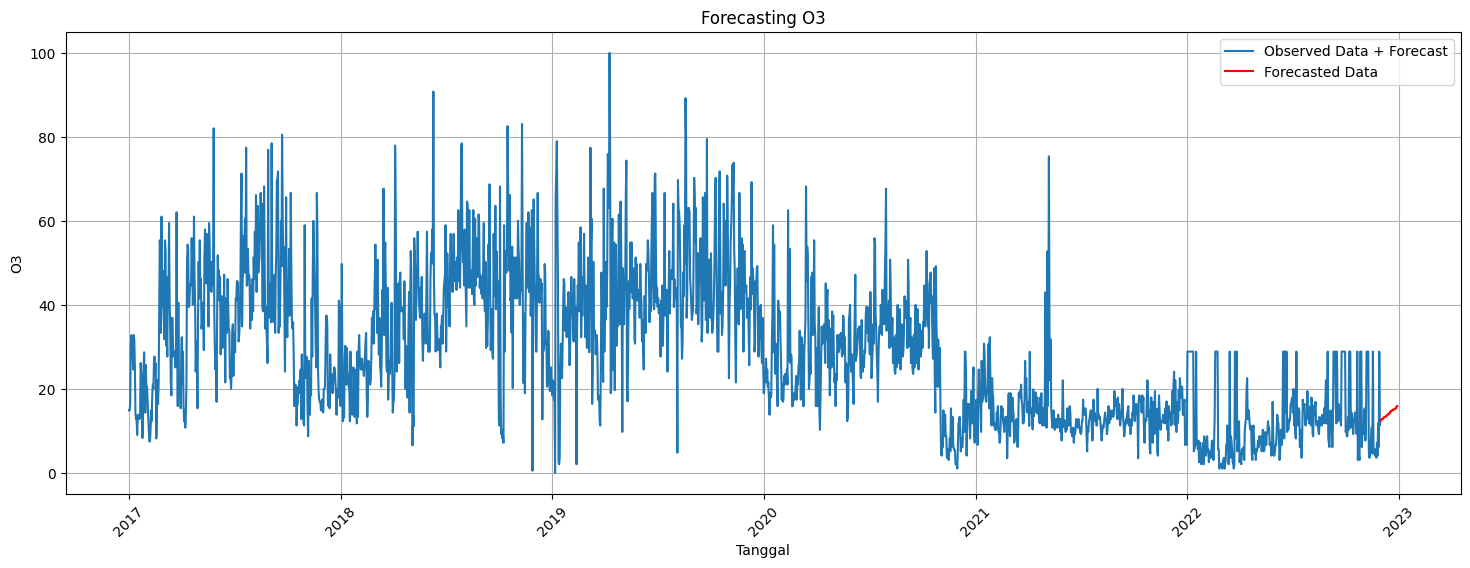

In [113]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI3[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI3['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI3['O3'].min()
max_par = DKI3['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI3['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.172
MSE: 0.030
MAE: 0.146
R-Squared: -2.615
       Tanggal         O3
0   2022-11-30  15.076923
1   2022-12-01  14.769231
2   2022-12-02  13.743590
3   2022-12-03  12.512821
4   2022-12-04  11.282051
5   2022-12-05  10.358974
6   2022-12-06   9.230769
7   2022-12-07   8.717949
8   2022-12-08   9.025641
9   2022-12-09   9.743590
10  2022-12-10  10.871795
11  2022-12-11  12.102564
12  2022-12-12  13.435897
13  2022-12-13  15.179487
14  2022-12-14  17.948718
15  2022-12-15  20.000000
16  2022-12-16  22.564103
17  2022-12-17  25.128205
18  2022-12-18  27.794872
19  2022-12-19  28.820513
20  2022-12-20  29.743590
21  2022-12-21  30.769231
22  2022-12-22  31.282051
23  2022-12-23  31.282051
24  2022-12-24  31.794872
25  2022-12-25  31.794872
26  2022-12-26  31.794872
27  2022-12-27  31.794872
28  2022-12-28  31.794872
29  2022-12-29  31.794872


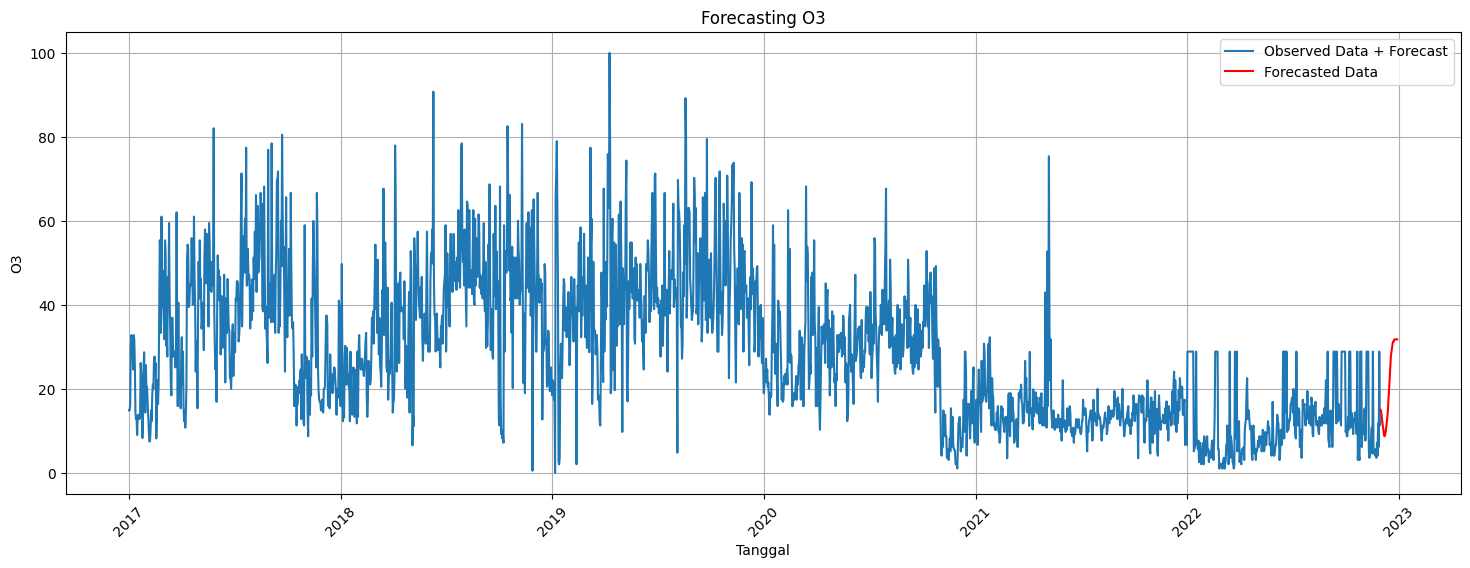

In [115]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI3[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI3['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI3['O3'].min()
max_par = DKI3['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI3['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.090
MSE: 0.008
MAE: 0.072
R-Squared: 0.009
       Tanggal         O3
0   2022-11-30  12.102564
1   2022-12-01  12.102564
2   2022-12-02  12.102564
3   2022-12-03  12.102564
4   2022-12-04  12.102564
5   2022-12-05  12.102564
6   2022-12-06  12.102564
7   2022-12-07  12.102564
8   2022-12-08  12.102564
9   2022-12-09  12.102564
10  2022-12-10  12.102564
11  2022-12-11  12.102564
12  2022-12-12  12.102564
13  2022-12-13  12.102564
14  2022-12-14  11.794872
15  2022-12-15  11.794872
16  2022-12-16  11.794872
17  2022-12-17  11.794872
18  2022-12-18  11.794872
19  2022-12-19  11.794872
20  2022-12-20  11.794872
21  2022-12-21  11.794872
22  2022-12-22  11.794872
23  2022-12-23  11.794872
24  2022-12-24  11.794872
25  2022-12-25  11.794872
26  2022-12-26  11.794872
27  2022-12-27  11.794872
28  2022-12-28  11.794872
29  2022-12-29  11.794872


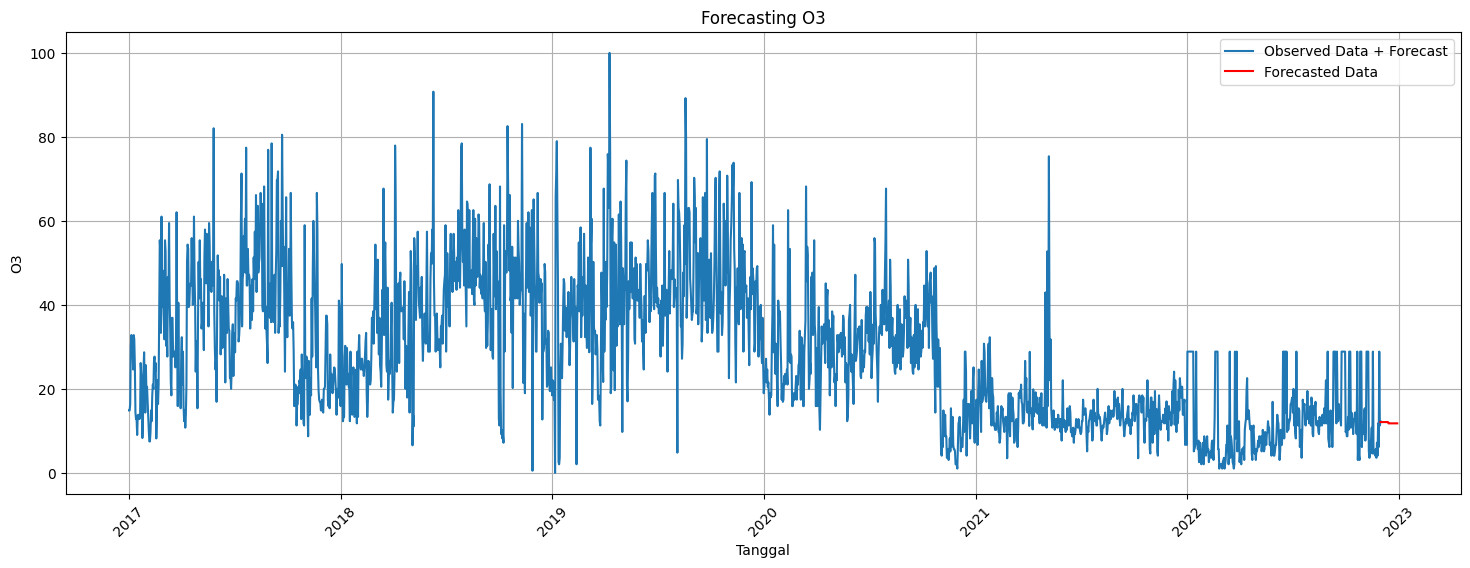

In [117]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI3[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI3['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI3['O3'].min()
max_par = DKI3['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI3['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.128
MSE: 0.017
MAE: 0.123
R-Squared: -1.013
       Tanggal         O3
0   2022-11-30  21.025641
1   2022-12-01  21.025641
2   2022-12-02  21.025641
3   2022-12-03  21.025641
4   2022-12-04  21.025641
5   2022-12-05  21.025641
6   2022-12-06  21.025641
7   2022-12-07  21.025641
8   2022-12-08  21.025641
9   2022-12-09  21.025641
10  2022-12-10  21.025641
11  2022-12-11  21.025641
12  2022-12-12  21.025641
13  2022-12-13  21.025641
14  2022-12-14  21.025641
15  2022-12-15  21.025641
16  2022-12-16  21.025641
17  2022-12-17  21.025641
18  2022-12-18  21.025641
19  2022-12-19  21.025641
20  2022-12-20  21.025641
21  2022-12-21  21.025641
22  2022-12-22  21.025641
23  2022-12-23  21.025641
24  2022-12-24  21.025641
25  2022-12-25  21.025641
26  2022-12-26  21.025641
27  2022-12-27  21.025641
28  2022-12-28  21.025641
29  2022-12-29  21.025641


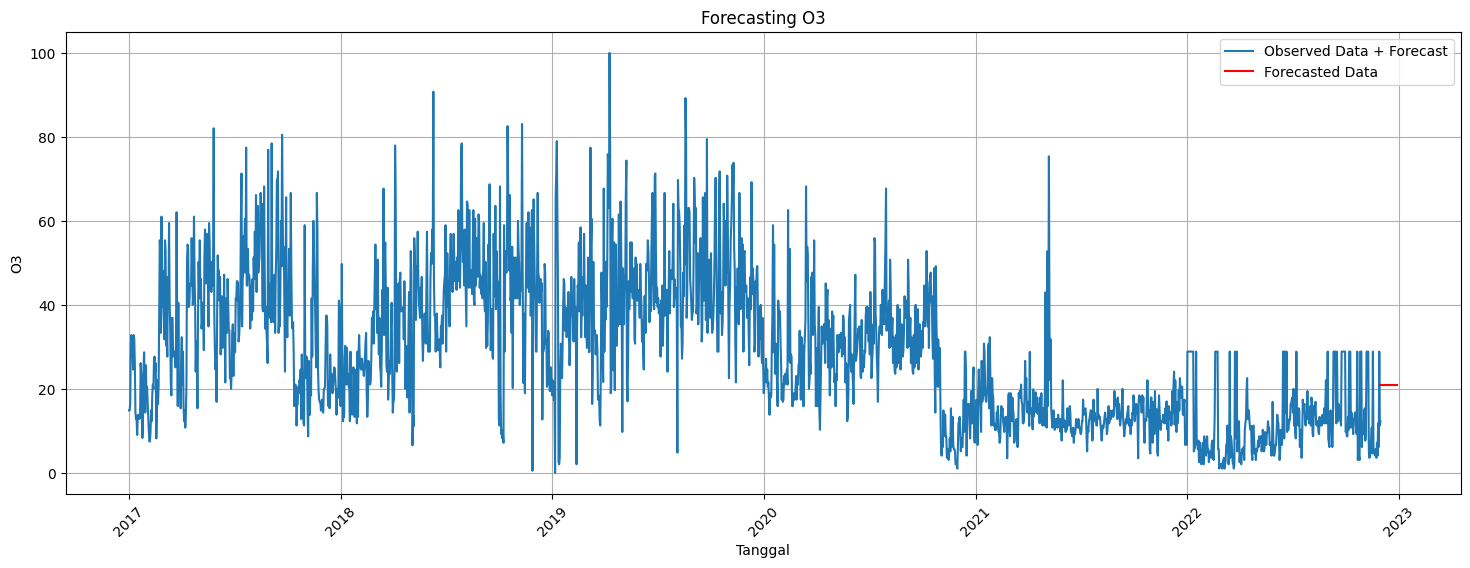

In [119]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI3[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI3['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI3['O3'].min()
max_par = DKI3['O3'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'O3': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI3['O3'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.132
MSE: 0.017
MAE: 0.126
R-Squared: -1.130
       Tanggal         O3
0   2022-11-30  21.538462
1   2022-12-01  21.538462
2   2022-12-02  21.538462
3   2022-12-03  21.538462
4   2022-12-04  21.538462
5   2022-12-05  21.538462
6   2022-12-06  21.538462
7   2022-12-07  21.538462
8   2022-12-08  21.538462
9   2022-12-09  21.538462
10  2022-12-10  21.538462
11  2022-12-11  21.538462
12  2022-12-12  21.538462
13  2022-12-13  21.538462
14  2022-12-14  21.538462
15  2022-12-15  21.538462
16  2022-12-16  21.538462
17  2022-12-17  21.538462
18  2022-12-18  21.538462
19  2022-12-19  21.538462
20  2022-12-20  21.538462
21  2022-12-21  21.538462
22  2022-12-22  21.538462
23  2022-12-23  21.538462
24  2022-12-24  21.538462
25  2022-12-25  21.538462
26  2022-12-26  21.538462
27  2022-12-27  21.538462
28  2022-12-28  21.538462
29  2022-12-29  21.538462


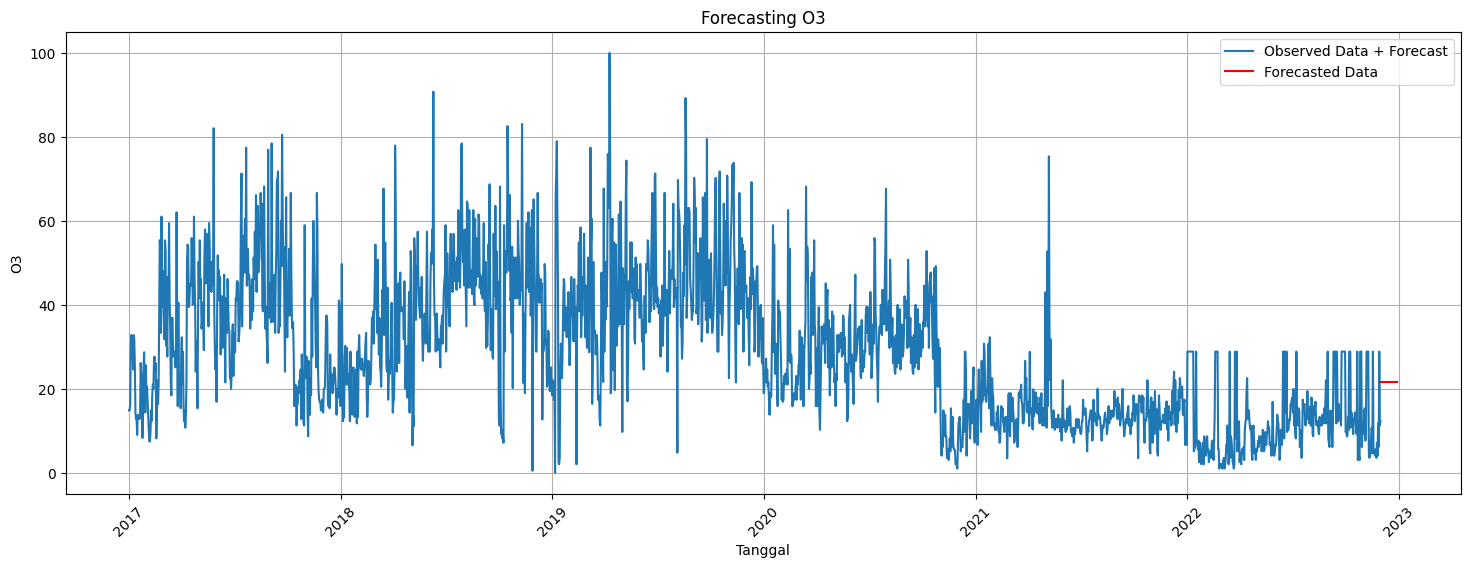

In [121]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI3['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'O3': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI3[['Tanggal', 'O3']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI3['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['O3'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('O3')
plt.title('Forecasting O3')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
